# Convolution vs Correlation

This notebook compares running [convolution](https://en.wikipedia.org/wiki/Convolution) and [cross-correlation](https://en.wikipedia.org/wiki/Cross-correlation) with the same kernel over an example syntheitc image. We also check by testing which one is used by filters from scikit-image.

For more information about comparing these methods, take a look at this blog post: [Convolution Vs Correlation](https://towardsdatascience.com/convolution-vs-correlation-af868b6b4fb5).

In [1]:
from scipy.ndimage import correlate, convolve
import numpy as np
from skimage import filters
import matplotlib.pyplot as plt

In [2]:
image1 = np.array([[0, 0, 2, 0, 0],
                   [0, 0, 2, 0, 0],
                   [0, 0, 4, 2, 2],
                   [0, 0, 2, 0, 0],
                   [0, 0, 2, 0, 0]]).astype(float)
prewitt_kernel_v = np.array(
    [[1/3, 0, -1/3],
     [1/3, 0, -1/3],
     [1/3, 0, -1/3]])

print(image1)
print(prewitt_kernel_v)

[[0. 0. 2. 0. 0.]
 [0. 0. 2. 0. 0.]
 [0. 0. 4. 2. 2.]
 [0. 0. 2. 0. 0.]
 [0. 0. 2. 0. 0.]]
[[ 0.33333333  0.         -0.33333333]
 [ 0.33333333  0.         -0.33333333]
 [ 0.33333333  0.         -0.33333333]]


Text(0.5, 1.0, 'prewitt_v_kernel')

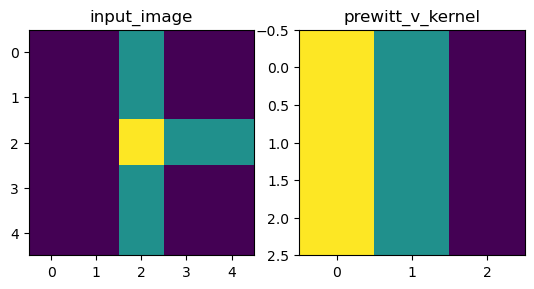

In [3]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(image1)
ax[0].set_title('input_image')
ax[1].imshow(prewitt_kernel_v)
ax[1].set_title('prewitt_v_kernel')

In [4]:
output_correlation = correlate(image1, prewitt_kernel_v)

output_convolution = convolve(image1, prewitt_kernel_v)

Text(0.5, 1.0, 'output_convolution')

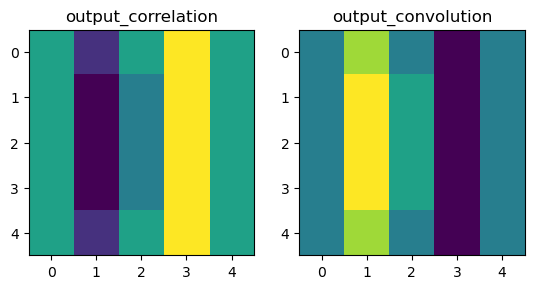

In [5]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(output_correlation)
ax[0].set_title('output_correlation')
ax[1].imshow(output_convolution)
ax[1].set_title('output_convolution')

In [6]:
output_correlation = correlate(image1, prewitt_kernel_v)

output_convolution = convolve(image1, prewitt_kernel_v)

In [7]:
# flip kernel columns
prewitt_kernel_v_columns_flipped = np.flip(prewitt_kernel_v, axis=1)
# flip kernel rows
prewitt_kernel_v_flipped = np.flip(prewitt_kernel_v_columns_flipped, axis = 0)

Text(0.5, 1.0, 'prewitt_v_kernel_flipped')

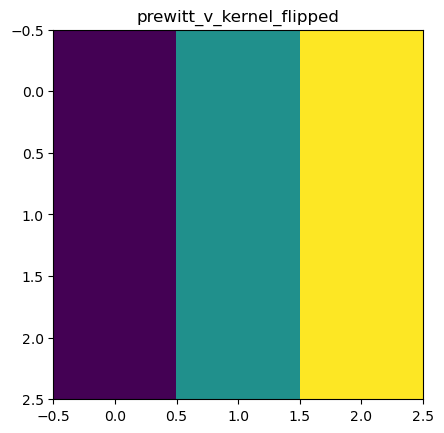

In [8]:
plt.imshow(prewitt_kernel_v_flipped)
plt.title('prewitt_v_kernel_flipped')

In [9]:
output_convolution_kernel_flipped = convolve(image1, prewitt_kernel_v_flipped)

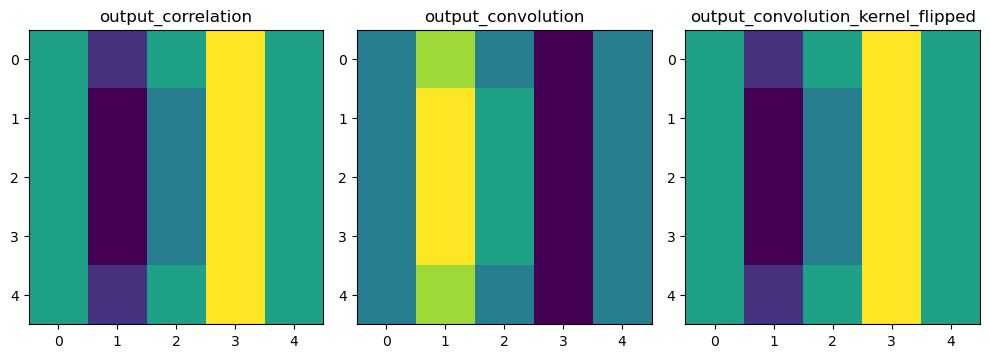

In [10]:
fig, ax = plt.subplots(1,3, figsize = (10,6))
ax[0].imshow(output_correlation)
ax[0].set_title('output_correlation')
ax[1].imshow(output_convolution)
ax[1].set_title('output_convolution')
ax[2].imshow(output_convolution_kernel_flipped)
ax[2].set_title('output_convolution_kernel_flipped')
plt.tight_layout()

In [11]:
output_prewitt_v_skimage = filters.prewitt_v(image1)

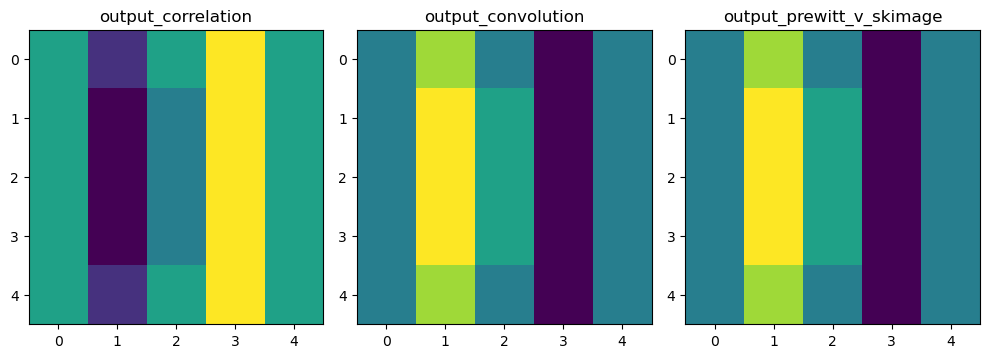

In [12]:
fig, ax = plt.subplots(1,3, figsize = (10,6))
ax[0].imshow(output_correlation)
ax[0].set_title('output_correlation')
ax[1].imshow(output_convolution)
ax[1].set_title('output_convolution')
ax[2].imshow(output_prewitt_v_skimage)
ax[2].set_title('output_prewitt_v_skimage')
plt.tight_layout()

## Gaussian

In [13]:
a = np.zeros((3, 3))
a[1, 1] = 1
gaussian_kernel = filters.gaussian(a, sigma=1)  # more smoothing
print(gaussian_kernel)

[[0.05855018 0.09653293 0.05855018]
 [0.09653293 0.15915589 0.09653293]
 [0.05855018 0.09653293 0.05855018]]


In [14]:
output_gaussian_convolution = convolve(image1, gaussian_kernel)

output_gaussian_correlation = correlate(image1, gaussian_kernel)

output_gaussian_filter = filters.gaussian(image1,sigma = 1)

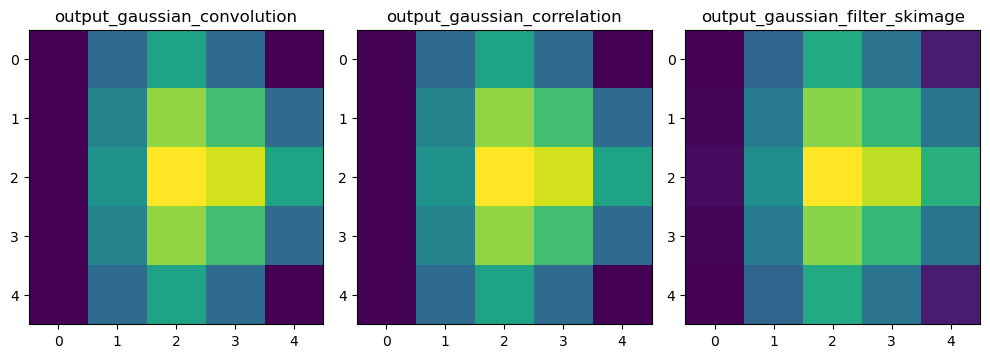

In [15]:
fig, ax = plt.subplots(1,3, figsize = (10,6))
ax[0].imshow(output_gaussian_convolution)
ax[0].set_title('output_gaussian_convolution')
ax[1].imshow(output_gaussian_correlation)
ax[1].set_title('output_gaussian_correlation')
ax[2].imshow(output_gaussian_filter)
ax[2].set_title('output_gaussian_filter_skimage')
plt.tight_layout()